# Usage Example: dataclasses

This notebook shows an example of using erdantic with the standard library's [dataclasses](https://docs.python.org/3/library/dataclasses.html) module.

Let's take a look at the models from the `erdantic.examples.dataclasses` module. Here's their source code for clariy.

In [1]:
import erdantic.examples.dataclasses
??erdantic.examples.dataclasses

Type:        module
String form: <module 'erdantic.examples.dataclasses' from '/Users/jqi/repos/erdantic/erdantic/examples/dataclasses.py'>
File:        ~/repos/erdantic/erdantic/examples/dataclasses.py
Source:     
"""Example data model classes using standard library's
[`dataclasses`](https://docs.python.org/3/library/dataclasses.html) module."""

from dataclasses import dataclass
from datetime import datetime
from typing import List, Optional


@dataclass
class Adventurer:
    """A person often late for dinner but with a tale or two to tell.

    Attributes:
        name (str): Name of this adventurer
        profession (str): Profession of this adventurer
        level (int): Level of this adventurer
        alignment (int): Alignment of this adventurer
    """

    name: str
    profession: str
    level: int
    affinity: str


@dataclass
class QuestGiver:
    """A person who offers a task that needs completing.

    Attributes:
        name (str): Name of this quest giver
       

## Using the CLI

The fastest way to rendering a diagram is to use the command-line interface. Below we use IPython's `!` to run a command in the system shell. We pass the full dotted path to the root class of our composition hierarchy. erdantic will walk the composition graph to find all child classes. 

In [2]:
!erdantic erdantic.examples.dataclasses.Party 

Rendered diagram to diagram.png


You can use the `-o` option to specify an output path instead of the default, which also lets you control the rendered format via the file extension.

## Using the Python library

You can also use the erdantic Python library, which lets you inspect the diagram object. The diagram object even automatically renders in Jupyter notebooks as demonstrated below. 

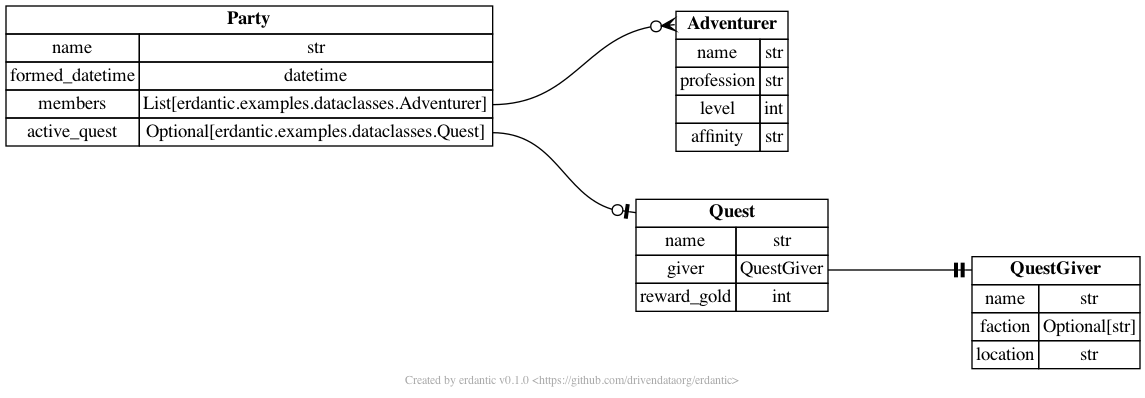

In [3]:
import erdantic as erd
from erdantic.examples.dataclasses import Party


diagram = erd.create(Party)
diagram

In [4]:
diagram.models

[DataClassModel(Adventurer),
 DataClassModel(Party),
 DataClassModel(Quest),
 DataClassModel(QuestGiver)]

In [5]:
diagram.edges

[Edge(source=DataClassModel(Party), source_field=<DataClassField: 'members', List[erdantic.examples.dataclasses.Adventurer]>, target=DataClassModel(Adventurer)),
 Edge(source=DataClassModel(Party), source_field=<DataClassField: 'active_quest', Optional[erdantic.examples.dataclasses.Quest]>, target=DataClassModel(Quest)),
 Edge(source=DataClassModel(Quest), source_field=<DataClassField: 'giver', QuestGiver>, target=DataClassModel(QuestGiver))]

You can use the `draw` method to render the diagram to disk.

In [6]:
diagram.draw("dataclasses.svg")

# Equivalently, use erd.draw directly from Party
# erd.draw(Party, out="dataclasses.svg")

erdantic uses [Graphviz](https://graphviz.org/), a venerable open-source C library, to create the diagram. Graphviz uses the [DOT language](https://graphviz.org/doc/info/lang.html) for describing graphs. You use the `to_dot` method to get the DOT representation as a string. 

In [7]:
print(diagram.to_dot())

# Equivalently, use erd.to_dot directly from Party
assert diagram.to_dot() == erd.to_dot(Party)

digraph "Entity Relationship Diagram" {
	graph [fontcolor=gray66,
		fontsize=9,
		label="Created by erdantic v0.1.0 <https://github.com/drivendataorg/erdantic>",
		nodesep=0.5,
		rankdir=LR,
		ranksep=1.5
	];
	node [fontsize=14,
		label="\N",
		shape=plain
	];
	Adventurer	[label=<<table border="0" cellborder="1" cellspacing="0"><tr><td port="_root" colspan="2"><b>Adventurer</b></td></tr><tr><td>name</td><td port="name">str</td></tr><tr><td>profession</td><td port="profession">str</td></tr><tr><td>level</td><td port="level">int</td></tr><tr><td>affinity</td><td port="affinity">str</td></tr></table>>,
		tooltip="erdantic.examples.dataclasses.Adventurer&#xA;&#xA;A person often late for dinner but with a tale or two to tell.&#xA;&#xA;Attributes:&#\
xA;    name (str): Name of this adventurer&#xA;    profession (str): Profession of this adventurer&#xA;    level (int): Level of \
this adventurer&#xA;    alignment (int): Alignment of this adventurer"];
	Party	[label=<<table border="0" cellbord